In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.transforms as transforms
import torch_geometric.data as data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

C:\Users\carlo\AppData\Local\Temp\ipykernel_7016\2043223261.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edges = torch.tensor([rows, cols])


In [4]:
edges_attr = np.random.choice(3,500)

In [5]:
ys = torch.rand([100]).round().long()

In [6]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [7]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

In [8]:
for prop in graph:
    print(prop)

('x', tensor([[0.8027, 0.3304, 0.5572,  ..., 0.1044, 0.6936, 0.6286],
        [0.1535, 0.6255, 0.0861,  ..., 0.6501, 0.9316, 0.7211],
        [0.1800, 0.7920, 0.6793,  ..., 0.0931, 0.4482, 0.8832],
        ...,
        [0.4014, 0.3931, 0.4908,  ..., 0.4893, 0.3125, 0.2288],
        [0.3089, 0.0100, 0.5491,  ..., 0.2700, 0.8746, 0.4482],
        [0.5542, 0.5346, 0.7043,  ..., 0.5042, 0.8831, 0.4329]]))
('edge_index', tensor([[51, 72, 26, 67, 39, 58, 81, 49,  7, 29, 31, 95, 19, 21, 66, 63, 64, 72,
         87, 73, 82, 30, 77, 18,  3, 62, 99, 91, 62, 98, 96, 44, 66, 28, 45, 96,
         97, 69, 68, 36, 75, 75, 94, 83, 12, 37, 84, 14, 72, 90, 57, 86, 75, 12,
         37, 97, 39, 53, 38, 49,  9, 51, 54, 25, 71, 15, 74, 77, 78, 92, 59, 44,
          2, 30, 37, 60, 79, 25, 87, 96, 97, 39, 26, 37, 91, 16, 60, 17, 65, 69,
         96, 79, 11, 38, 12, 65, 81, 59, 23, 70, 79, 83, 47, 87, 25, 65, 40, 92,
         55, 60, 47, 99, 28, 44,  1, 22, 42, 31, 67, 61,  2, 96,  8, 53, 51, 48,
         36, 

<function matplotlib.pyplot.show(close=None, block=None)>

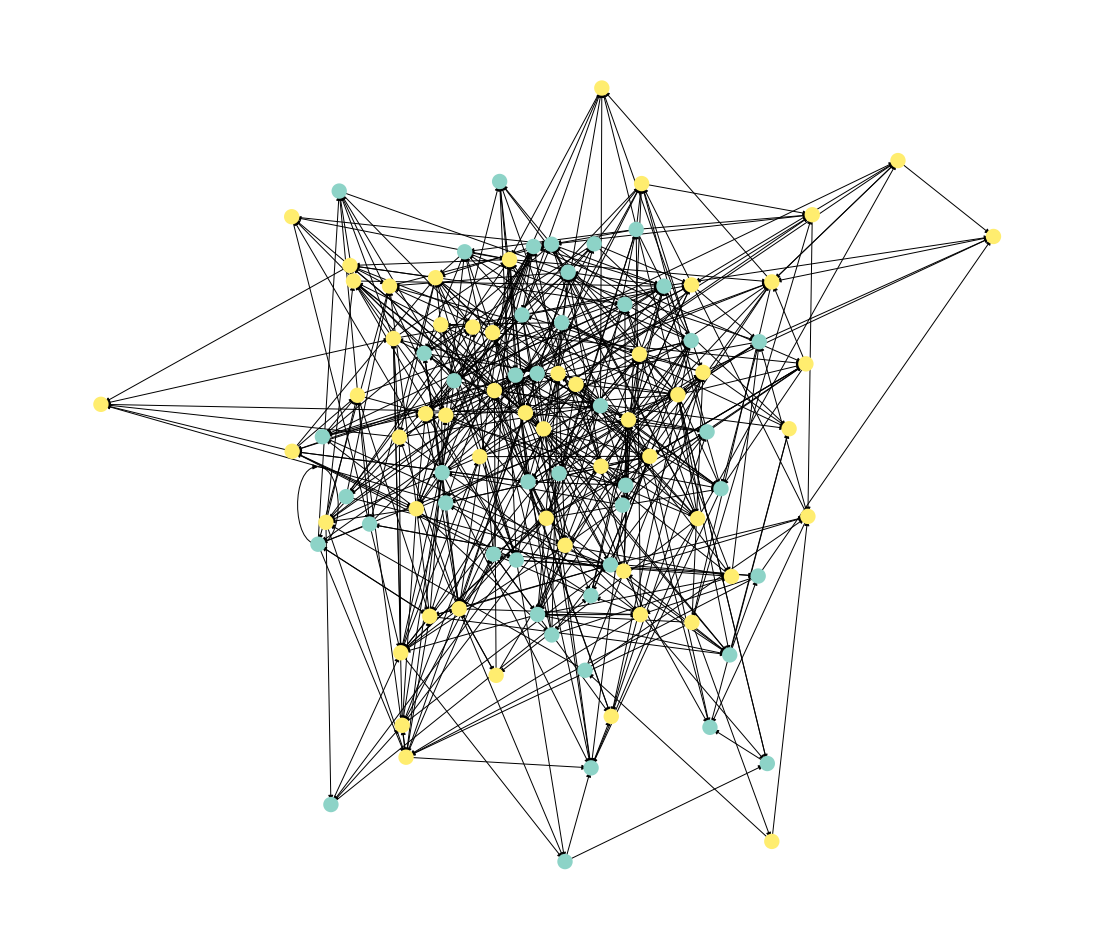

In [9]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1, figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels, node_size=70, linewidths=7)
plt.show

In [10]:
# batch
graph2 = graph

In [11]:
batch = data.Batch().from_data_list([graph, graph2])

In [12]:
print('Number of Graphs : ', batch.num_graphs)
print('Graph at Index : ', batch[1])
print('Retrive the lists of graphs:\n', len(batch.to_data_list()))

Number of Graphs :  2
Graph at Index :  Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrive the lists of graphs:
 2


In [13]:
import torch_geometric.loader as loader

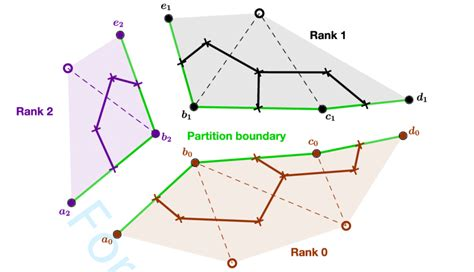

In [17]:
cluster = data.ClusterData(graph, 5)

Computing METIS partitioning...


AssertionError: 

In [14]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                              shuffle=False)

C:\Users\carlo\anaconda3\envs\gnn\lib\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


AssertionError: 